In [1]:
library(tidyverse)
library(randomcoloR)

summary_all_common <- read_rds("summary_all_common.rds")
summary_all_common_diff <- read_rds("summary_all_common_diff.rds")
colnames(summary_all_common_diff)

selected_features <- c("df_R", "Length", "Site_patterns","F_type", "class", "Best", "If_mix",
    "Percent_parsimony_informative","BIC", "Likelihood", "Tree_Length", "Ntaxa", "Num_class_on_mixture")
features <- summary_all_common %>% select(all_of(c(selected_features)))

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "Type"                          "Locus_name"                   
 [3] "d_1st Qu."                     "d_3rd Qu."                    
 [5] "d_AIC"                         "d_AICc"                       
 [7] "d_BIC"                         "d_KF_distance"                
 [9] "d_Likelihood"                  "d_Max."                       
[11] "d_Mean"                        "d_Median"                     
[13] "d_Min."                        "d_PD_distance"                
[15] "d_RF_distance"                 "d_Sum_int"                    
[17] "d_Tree_Length"                 "d_Unconstrained_likelihood"   
[19] "d_nRF_distance"                "d_prop_int"                   
[21] "d_wPD_distance"                "d_wRF_distance"               
[23] "d_If_mix"                      "d_Best"                       
[25] "Model"                         "Model_string"                 
[27] "Rates"                         "Likelihood"                   
[29] "Unconstrained_likelihood"      "parameters"                   
[31] "AIC"                           "AICc"                         
[33] "BIC"                           "Best"                         
[35] "Length"                        "Ntaxa"                        
[37] "Percent_constant"              "Percent_parsimony_informative"
[39] "Site_patterns"                 "RF_distance"                  
[41] "nRF_distance"                  "wRF_distance"                 
[43] "KF_distance"                   "PD_distance"                  
[45] "wPD_distance"                  "Tree_Length"                  
[47] "Sum_int"                       "prop_int"                     
[49] "Min."                          "1st Qu."                      
[51] "Median"                        "Mean"                         
[53] "3rd Qu."                       "Max."                         
[55] "If_mix"                        "Num_class"                    
[57] "Num_class_on_mixture"          "class_id"                     
[59] "class"                         "F_type"                       
[61] "df_R"                          "R"                            
[63] "F"                             "Q"                            
[65] "base_freq"

In [56]:
theme_Publication <- function(base_size=14, base_family="helvetica") {
    theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.4, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          )
      
}

Standard deviations (1, .., p=6):
[1] 1.5218729 1.2593217 1.0203894 0.9352958 0.3311152 0.2690755

Rotation (n x k) = (6 x 6):
           PC1         PC2         PC3         PC4          PC5          PC6
A-C 0.05699302  0.06775795 -0.84508142 -0.52530285  0.045115013 -0.004428703
A-G 0.48664325  0.50912040  0.05081796  0.04233941 -0.003904761 -0.706812871
A-T 0.45921045 -0.41219011  0.21958712 -0.41116084 -0.633844937  0.013925819
C-G 0.26017527 -0.26818042 -0.47984048  0.74119339 -0.284195303 -0.002570261
C-T 0.48839465  0.50688761  0.04053877  0.04907800  0.021948213  0.707108096
G-T 0.49278332 -0.48728720  0.05609064 -0.03787844  0.717594098 -0.013912516

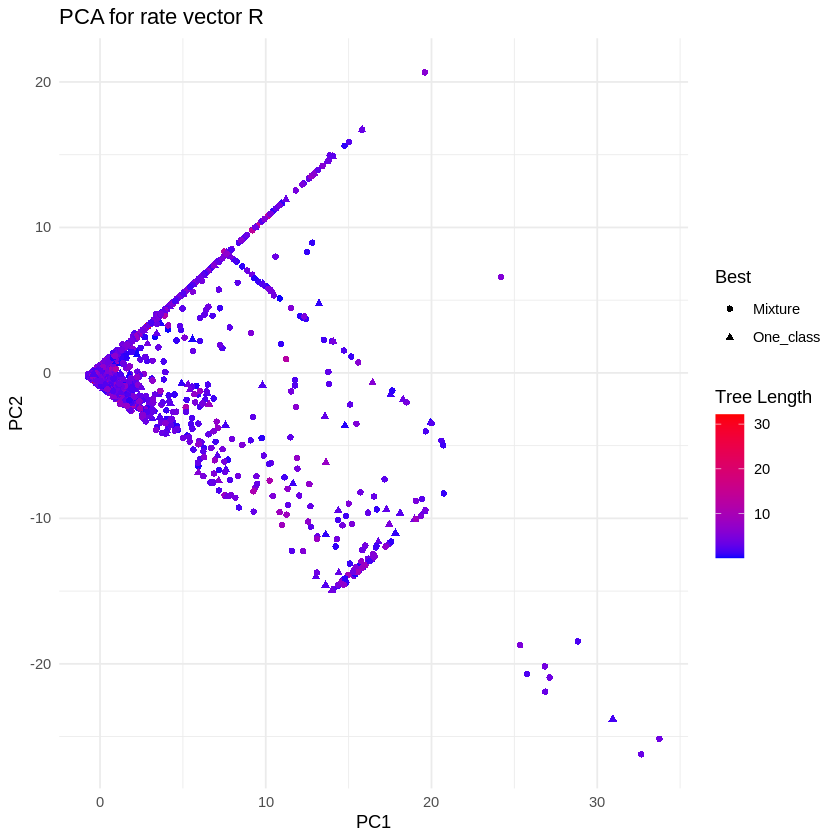

In [2]:
options(repr.plot.width = 7, repr.plot.height = 7)
# Convert R list to matrix
data_matrix <- do.call(rbind, lapply(summary_all_common$R, function(x) unlist(x)))
# Standardize the data
data_scaled <- scale(data_matrix)
# Perform PCA analysis
pca_result <- prcomp(data_scaled)
# Import ggplot2 package
library(ggplot2)

# Create a dataframe that includes principal component scores and Tree_Length
df <- data.frame(PC1 = pca_result$x[,1], PC2 = pca_result$x[,2], 
                 Tree_Length = summary_all_common$Tree_Length, Best = summary_all_common$Best)

# Draw a two-dimensional image
ggplot(df, aes(x = PC1, y = PC2, color = Tree_Length, pch = Best)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  theme_minimal() +
  labs(x = "PC1", y = "PC2", color = "Tree Length") +
  ggtitle("PCA for rate vector R")

                                     
pca_result

In [3]:
summary_all_common %>% select(df_R) %>% summarise(mean = mean(df_R + 1), sd = sd(df_R))

mean,sd
<dbl>,<dbl>
2.63135,0.958352


Standard deviations (1, .., p=6):
[1] 7.593838e+00 3.238532e+00 3.095713e+00 2.564295e+00 1.506445e+00
[6] 2.176807e-15

Rotation (n x k) = (6 x 6):
            PC1         PC2         PC3          PC4          PC5        PC6
[1,]  0.1486448 -0.23762245  0.17650666 -0.652633716  0.545608157 -0.4082483
[2,] -0.5717603 -0.61470469 -0.21859908  0.284129180 -0.006833905 -0.4082483
[3,]  0.3842262  0.08300596 -0.71084655 -0.189639691 -0.370874057 -0.4082483
[4,]  0.1854351 -0.12085185  0.63955853  0.002428054 -0.612618138 -0.4082483
[5,] -0.5519383  0.71709253  0.04455867 -0.111346552  0.009603875 -0.4082483
[6,]  0.4053925  0.17308051  0.06882176  0.667062726  0.435114069 -0.4082483

3.648549,18.743739,3.883041,2.720905,18.048368,2.955398
8.333333,8.333333,8.333333,8.333333,8.333333,8.333333


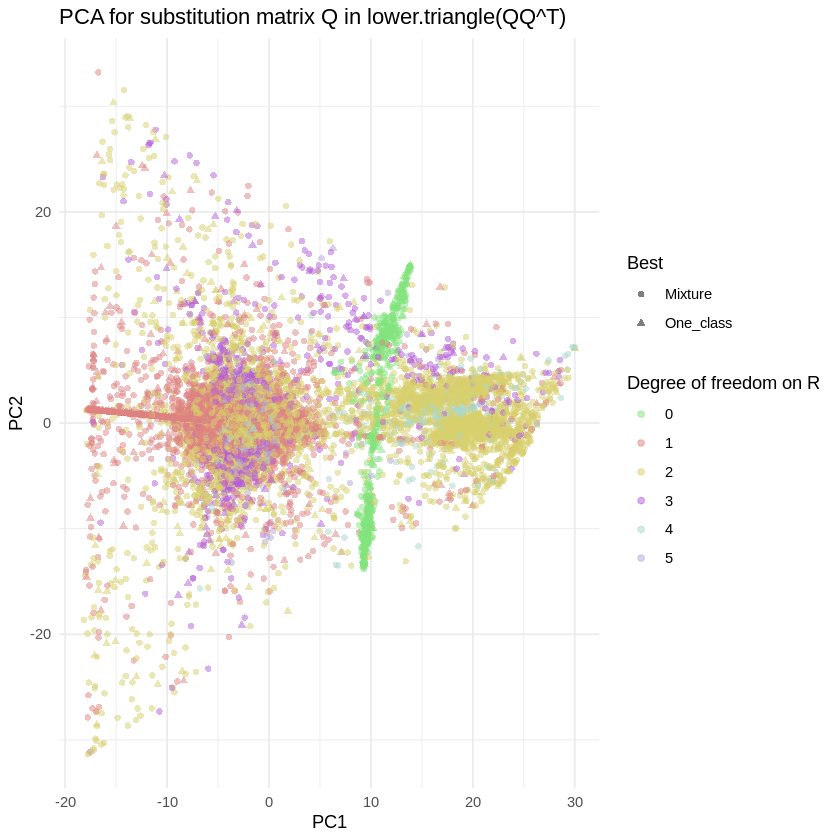

In [18]:
readQ <- function(matrix) {
  # read lower-diagonal matrix
  Q = matrix
  # pi = Q[nrow(Q), 1:(ncol(Q)-1)]
  # Q = Q[1:(nrow(Q)-1), 1:(ncol(Q)-1)]
  # make Q symmetric
  Q = (Q + t(Q))
  diag(Q) <- 0
  # normalise the matrix
  Q=(Q/sum(Q))*100.0
  Q = Q[lower.tri(Q)]
  return(as.vector(Q))
}
data_matrix <- lapply(summary_all_common$Q, readQ)

# data_matrix <- lapply(summary_all_common$Q, as.numeric)
data_matrix <- do.call(rbind, data_matrix)
# Perform PCA analysis
pca_result <- prcomp(data_matrix)

# create a data frame with PC1 and PC2 coordinates
df <- data.frame(PC1 = pca_result$x[,1], PC2 = pca_result$x[,2])
df <- cbind(df, features)

df_color <- distinctColorPalette(6)
# plot the data
ggplot(df, aes(x = PC1, y = PC2, color = as.factor(df_R), pch = Best)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = df_color) +
  theme_minimal() +
  labs(x = "PC1", y = "PC2", color = "Degree of freedom on R") +
  ggtitle("PCA for substitution matrix Q in lower.triangle(QQ^T)")

pca_result

data_matrix[1:2,]

Standard deviations (1, .., p=6):
[1] 7.593838e+00 3.238532e+00 3.095713e+00 2.564295e+00 1.506445e+00
[6] 2.176807e-15

Rotation (n x k) = (6 x 6):
            PC1         PC2         PC3          PC4          PC5        PC6
[1,]  0.1486448 -0.23762245  0.17650666 -0.652633716  0.545608157 -0.4082483
[2,] -0.5717603 -0.61470469 -0.21859908  0.284129180 -0.006833905 -0.4082483
[3,]  0.3842262  0.08300596 -0.71084655 -0.189639691 -0.370874057 -0.4082483
[4,]  0.1854351 -0.12085185  0.63955853  0.002428054 -0.612618138 -0.4082483
[5,] -0.5519383  0.71709253  0.04455867 -0.111346552  0.009603875 -0.4082483
[6,]  0.4053925  0.17308051  0.06882176  0.667062726  0.435114069 -0.4082483

3.648549,18.743739,3.883041,2.720905,18.048368,2.955398
8.333333,8.333333,8.333333,8.333333,8.333333,8.333333


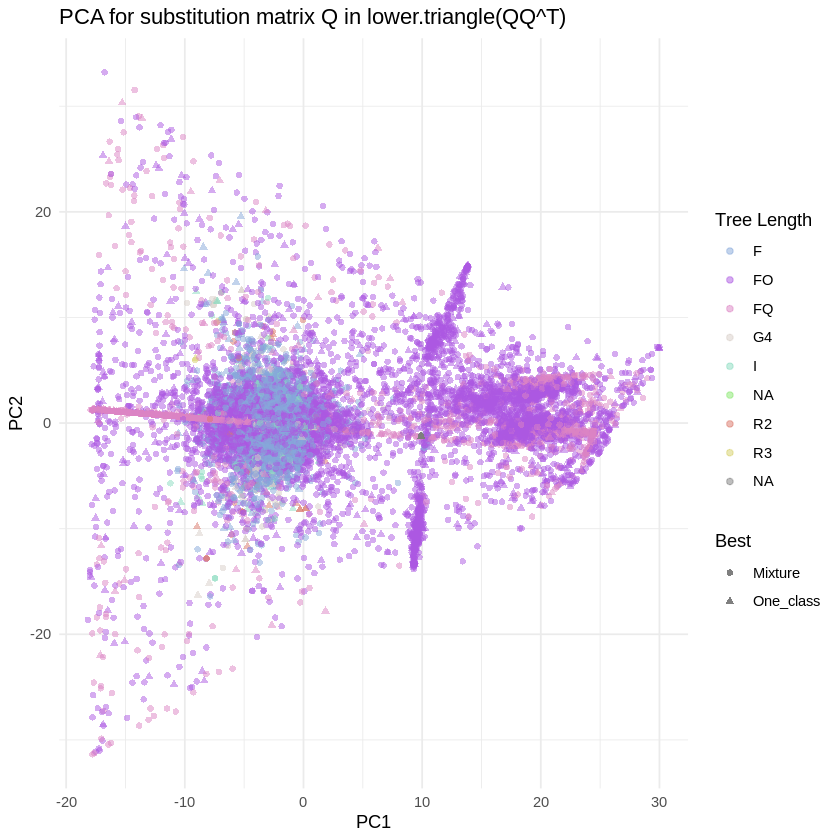

In [5]:
# plot the data
F_color <- distinctColorPalette(8)
ggplot(df, aes(x = PC1, y = PC2, color = as.factor(F_type), pch = Best)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = F_color) +
  theme_minimal() +
  labs(x = "PC1", y = "PC2", color = "Tree Length") +
  ggtitle("PCA for substitution matrix Q in lower.triangle(QQ^T)")

pca_result

data_matrix[1:2,]

Standard deviations (1, .., p=6):
[1] 7.593838e+00 3.238532e+00 3.095713e+00 2.564295e+00 1.506445e+00
[6] 2.176807e-15

Rotation (n x k) = (6 x 6):
            PC1         PC2         PC3          PC4          PC5        PC6
[1,]  0.1486448 -0.23762245  0.17650666 -0.652633716  0.545608157 -0.4082483
[2,] -0.5717603 -0.61470469 -0.21859908  0.284129180 -0.006833905 -0.4082483
[3,]  0.3842262  0.08300596 -0.71084655 -0.189639691 -0.370874057 -0.4082483
[4,]  0.1854351 -0.12085185  0.63955853  0.002428054 -0.612618138 -0.4082483
[5,] -0.5519383  0.71709253  0.04455867 -0.111346552  0.009603875 -0.4082483
[6,]  0.4053925  0.17308051  0.06882176  0.667062726  0.435114069 -0.4082483

3.648549,18.743739,3.883041,2.720905,18.048368,2.955398
8.333333,8.333333,8.333333,8.333333,8.333333,8.333333


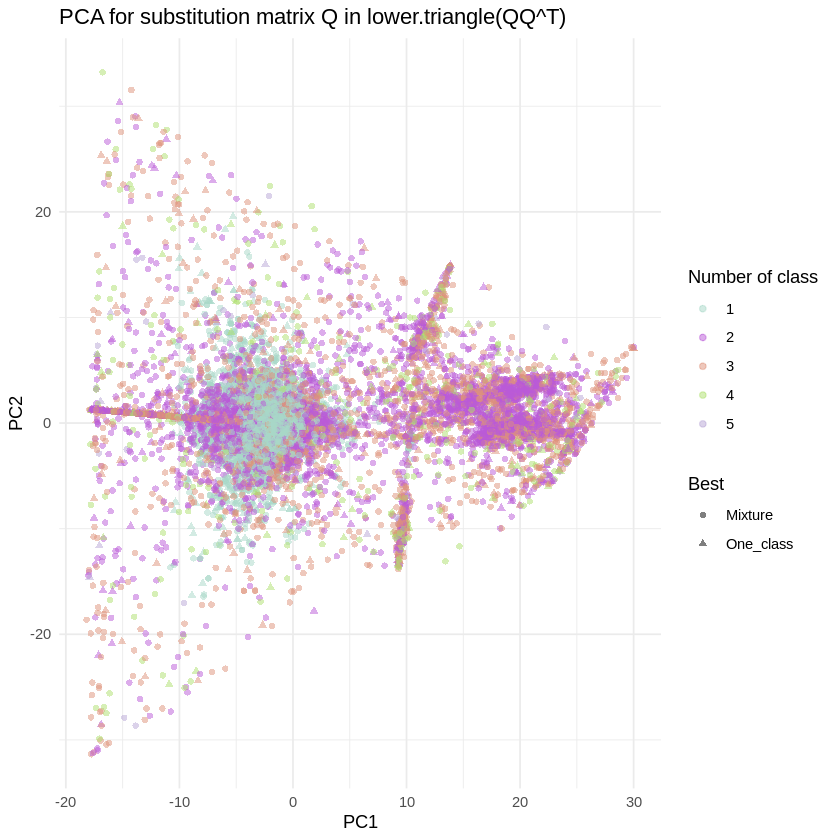

In [21]:
# plot the data
Class_color <- distinctColorPalette(5)
ggplot(df, aes(x = PC1, y = PC2, color = as.factor(Num_class_on_mixture), pch = Best)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = Class_color) +
  theme_minimal() +
  labs(x = "PC1", y = "PC2", color = "Number of class") +
  ggtitle("PCA for substitution matrix Q in lower.triangle(QQ^T)")

pca_result

data_matrix[1:2,]

Standard deviations (1, .., p=6):
[1] 7.593838e+00 3.238532e+00 3.095713e+00 2.564295e+00 1.506445e+00
[6] 2.176807e-15

Rotation (n x k) = (6 x 6):
            PC1         PC2         PC3          PC4          PC5        PC6
[1,]  0.1486448 -0.23762245  0.17650666 -0.652633716  0.545608157 -0.4082483
[2,] -0.5717603 -0.61470469 -0.21859908  0.284129180 -0.006833905 -0.4082483
[3,]  0.3842262  0.08300596 -0.71084655 -0.189639691 -0.370874057 -0.4082483
[4,]  0.1854351 -0.12085185  0.63955853  0.002428054 -0.612618138 -0.4082483
[5,] -0.5519383  0.71709253  0.04455867 -0.111346552  0.009603875 -0.4082483
[6,]  0.4053925  0.17308051  0.06882176  0.667062726  0.435114069 -0.4082483

3.648549,18.743739,3.883041,2.720905,18.048368,2.955398
8.333333,8.333333,8.333333,8.333333,8.333333,8.333333


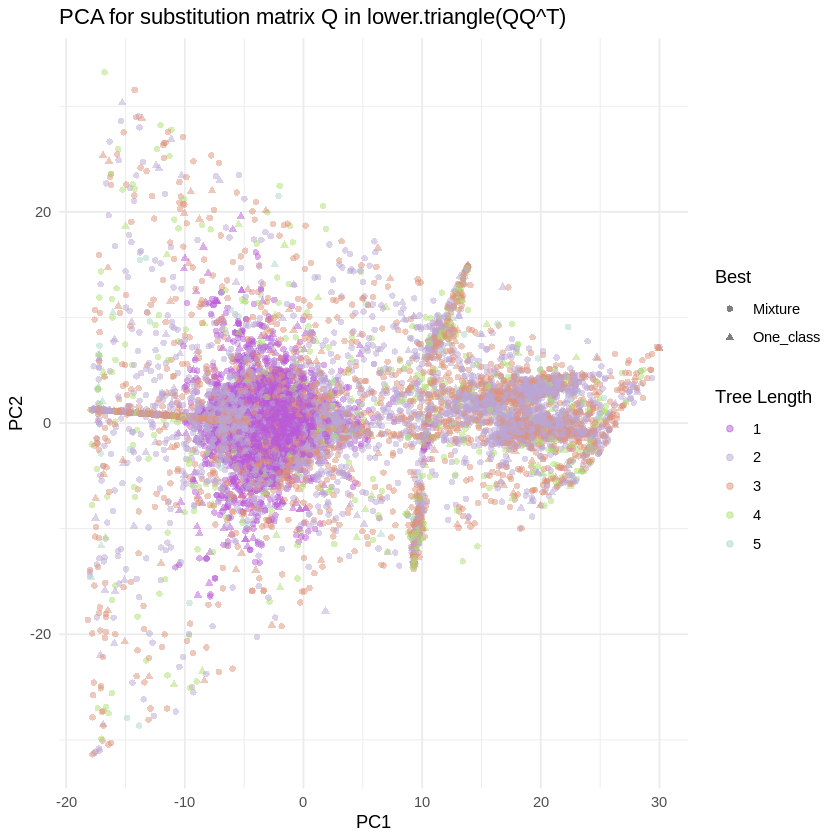

In [7]:
# plot the data
Class_color <- distinctColorPalette(5)
ggplot(df, aes(x = PC1, y = PC2, color = as.factor(Num_class_on_mixture), pch = Best)) +
  geom_point(alpha = 0.5) +
  scale_color_manual(values = Class_color) +
  theme_minimal() +
  labs(x = "PC1", y = "PC2", color = "Tree Length") +
  ggtitle("PCA for substitution matrix Q in lower.triangle(QQ^T)")

pca_result

data_matrix[1:2,]

In [46]:
# Load necessary libraries
library(caret)
library(leaps)
library(pROC)

summary_intergated <- read.csv("summary_intergated.csv")

label <- "Num_class_on_mixture"
miss_cols <- c("Type", "Locus_name", "Model_string", "Model", "parameters", "Best", "If_mix")
d_cols <- grep("^d_", colnames(summary_intergated), value = TRUE)
distance_cols <- grep("_distance$", colnames(summary_intergated), value = TRUE)
class_cols <- grep("class", colnames(summary_intergated), value = TRUE)
exclued_features <- setdiff(c(miss_cols, d_cols, distance_cols, class_cols), label)

# Assume summary_all_common_diff is your dataset
data <- summary_intergated %>% select(-all_of(c(exclued_features))) %>% na.omit()
BSS_formula <- as.formula(paste(label, "~", paste(setdiff(colnames(data), label), collapse = "+")))

colnames(data)

[1] "Rates"                         "Likelihood"                   
 [3] "Unconstrained_likelihood"      "AIC"                          
 [5] "AICc"                          "BIC"                          
 [7] "Length"                        "Ntaxa"                        
 [9] "Percent_constant"              "Percent_parsimony_informative"
[11] "Site_patterns"                 "Tree_Length"                  
[13] "Sum_int"                       "prop_int"                     
[15] "Min."                          "X1st.Qu."                     
[17] "Median"                        "Mean"                         
[19] "X3rd.Qu."                      "Max."                         
[21] "Num_class_on_mixture"          "Run_time"                     
[23] "F_type"                        "df_R"                         
[25] "trace_Q"                       "sd_R"                         
[27] "sd_base_freq"                  "LperL"                        
[29] "Num_base"                      "Info_to_cons"                 
[31] "Info_length"                   "Max_R"                        
[33] "Interval_base_freq"

In [47]:
# 使用regsubsets()函数进行BSS，设置最大特征数为8
bss_model <- regsubsets(BSS_formula, data = data, nvmax = 15)

# 查看每个特征数下的最佳模型
summary(bss_model)

# 选择一个最优的特征数，比如根据BIC标准
bic_values <- summary(bss_model)$bic
best_n <- which.min(bic_values)
best_n

# 查看最优特征数下的最佳模型包含哪些特征
best_features <- names(which(summary(bss_model)$which[best_n, ] == TRUE))
best_features

lr_model <- lm(BSS_formula, data = data)

Subset selection object
Call: regsubsets.formula(BSS_formula, data = data, nvmax = 15)
42 Variables  (and intercept)
                              Forced in Forced out
RatesI                            FALSE      FALSE
RatesI+G4                         FALSE      FALSE
RatesI+R2                         FALSE      FALSE
RatesI+R3                         FALSE      FALSE
RatesNone                         FALSE      FALSE
RatesR2                           FALSE      FALSE
RatesR3                           FALSE      FALSE
RatesR4                           FALSE      FALSE
Likelihood                        FALSE      FALSE
Unconstrained_likelihood          FALSE      FALSE
AIC                               FALSE      FALSE
AICc                              FALSE      FALSE
BIC                               FALSE      FALSE
Length                            FALSE      FALSE
Ntaxa                             FALSE      FALSE
Percent_constant                  FALSE      FALSE
Percent_parsimon

[1] 15

[1] "(Intercept)"        "AICc"               "Ntaxa"             
 [4] "Percent_constant"   "Tree_Length"        "X1st.Qu."          
 [7] "Median"             "Mean"               "Max."              
[10] "Run_time"           "df_R"               "trace_Q"           
[13] "sd_base_freq"       "LperL"              "Info_length"       
[16] "Interval_base_freq"

In [48]:
selected_features <- c("AICc", "Ntaxa", "Percent_constant", "Tree_Length", "X1st.Qu.", "Mean", 
                       "X3rd.Qu.", "Max.", "df_R", "trace_Q", "sd_base_freq", "LperL", "Info_length", "Interval_base_freq")
formula <- as.formula(paste(label, "~", paste(selected_features, collapse = "+")))
lm_model <- lm(formula, data = data)
summary(lm_model)



Call:
lm(formula = formula, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9571 -0.3808 -0.1850  0.2084  3.8966 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.396e-01  1.142e-01  -2.973  0.00295 ** 
AICc                7.264e-05  5.283e-06  13.750  < 2e-16 ***
Ntaxa              -7.756e-03  4.747e-04 -16.340  < 2e-16 ***
Percent_constant    1.614e+00  1.234e-01  13.075  < 2e-16 ***
Tree_Length        -1.465e-01  7.930e-03 -18.471  < 2e-16 ***
X1st.Qu.           -6.884e+00  7.572e-01  -9.092  < 2e-16 ***
Mean                6.087e+00  5.489e-01  11.089  < 2e-16 ***
X3rd.Qu.           -4.195e-01  3.260e-01  -1.287  0.19820    
Max.                1.195e-01  1.421e-02   8.409  < 2e-16 ***
df_R                6.672e-02  7.356e-03   9.071  < 2e-16 ***
trace_Q             2.725e-01  8.790e-02   3.100  0.00194 ** 
sd_base_freq       -6.446e+00  1.305e+00  -4.938 7.98e-07 ***
LperL              -1.430e-01  7.961e-03 -1

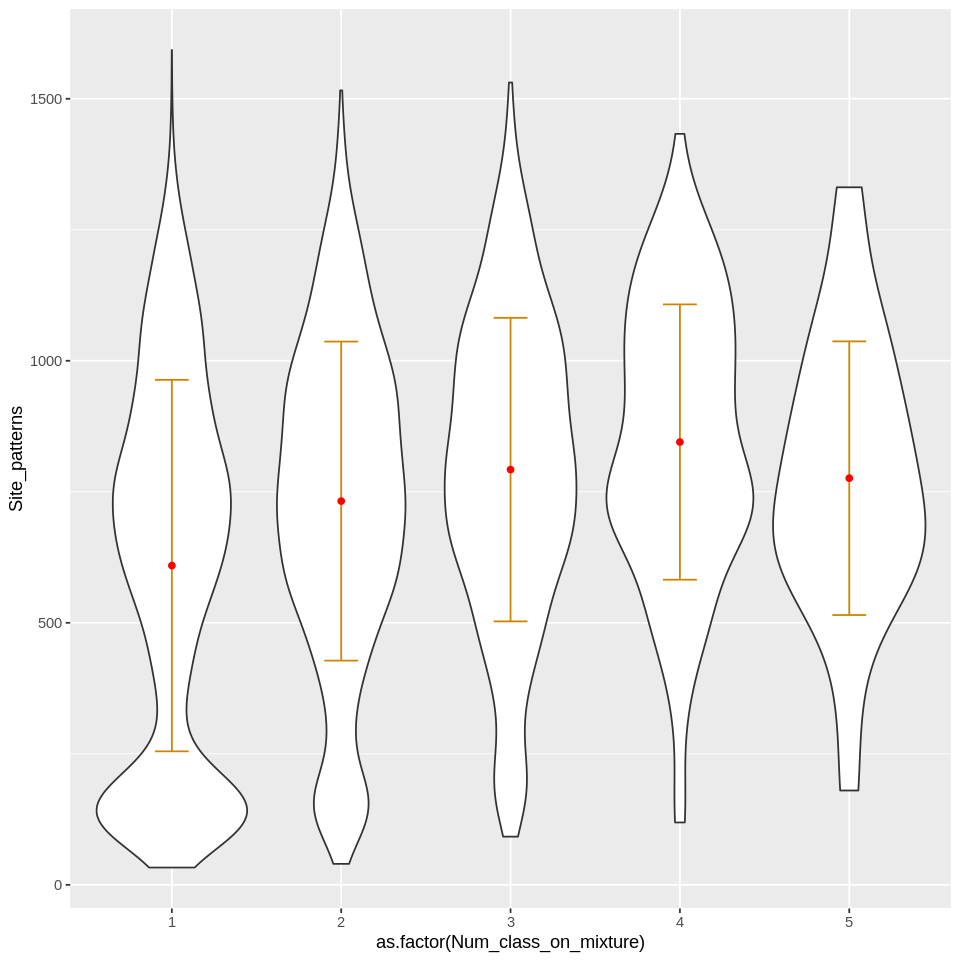

In [49]:
data %>% 
    ggplot(aes(x = as.factor(Num_class_on_mixture), y = Site_patterns)) + 
    geom_violin() +
    stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
                 geom = "errorbar", width = 0.2, color = "orange3") +
    stat_summary(fun = mean, geom = "point", color = "red")


Warning message:
“Removed 5 rows containing missing values (`geom_segment()`).”


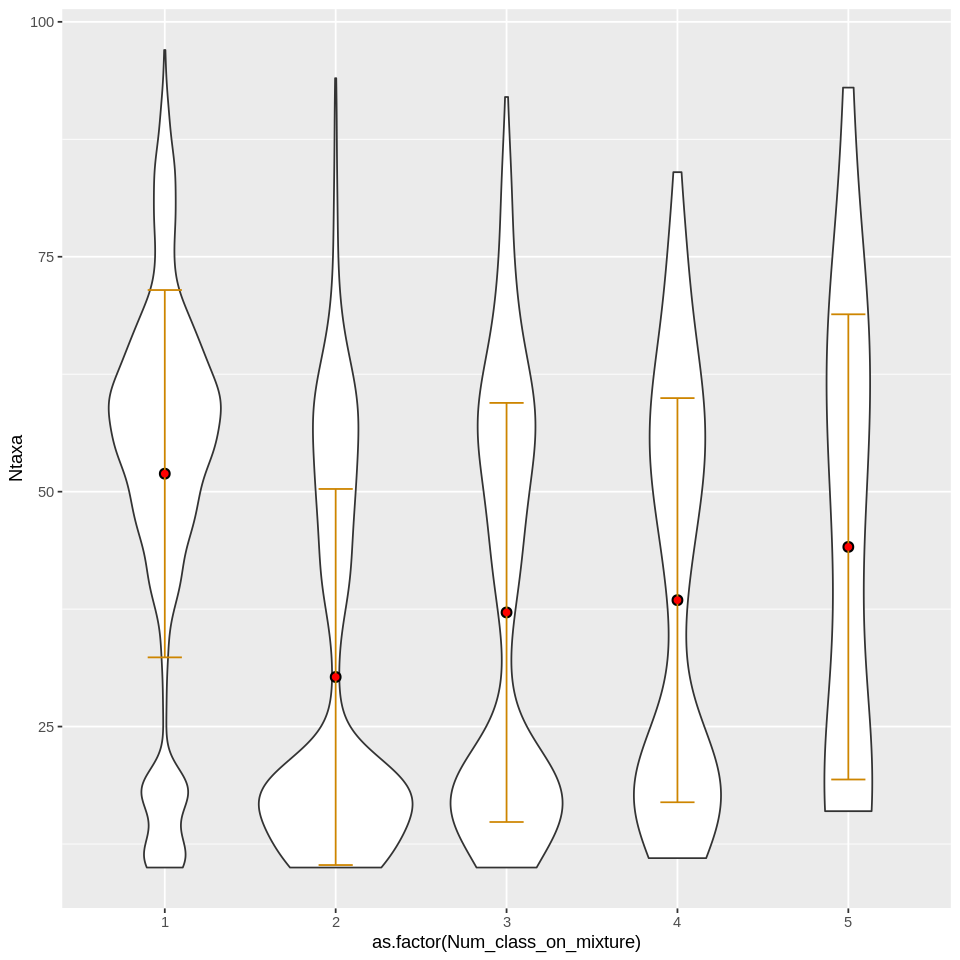

In [50]:
data %>% 
    ggplot(aes(x = as.factor(Num_class_on_mixture), y = Ntaxa)) + 
    geom_violin() + stat_summary(fun = mean) +
    stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
                 geom = "errorbar", width = 0.2, color = "orange3") +
    stat_summary(fun = mean, geom = "point", color = "red")

Warning message:
“Removed 5 rows containing missing values (`geom_segment()`).”


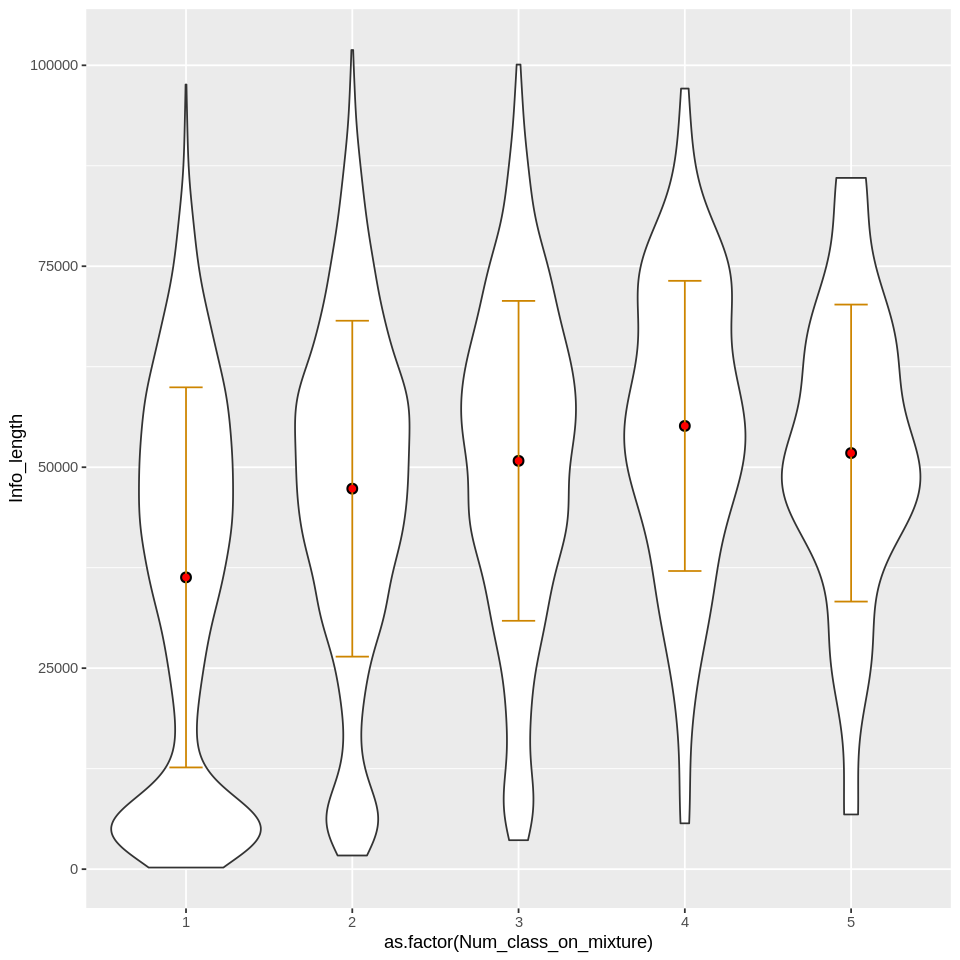

In [51]:
data %>% 
    ggplot(aes(x = as.factor(Num_class_on_mixture), y = Info_length)) + 
    geom_violin() + stat_summary(fun = mean) +
    stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), 
                 geom = "errorbar", width = 0.2, color = "orange3") +
    stat_summary(fun = mean, geom = "point", color = "red")

In [52]:
prediction <- predict(lm_model, data)
data <- cbind(data, prediction)

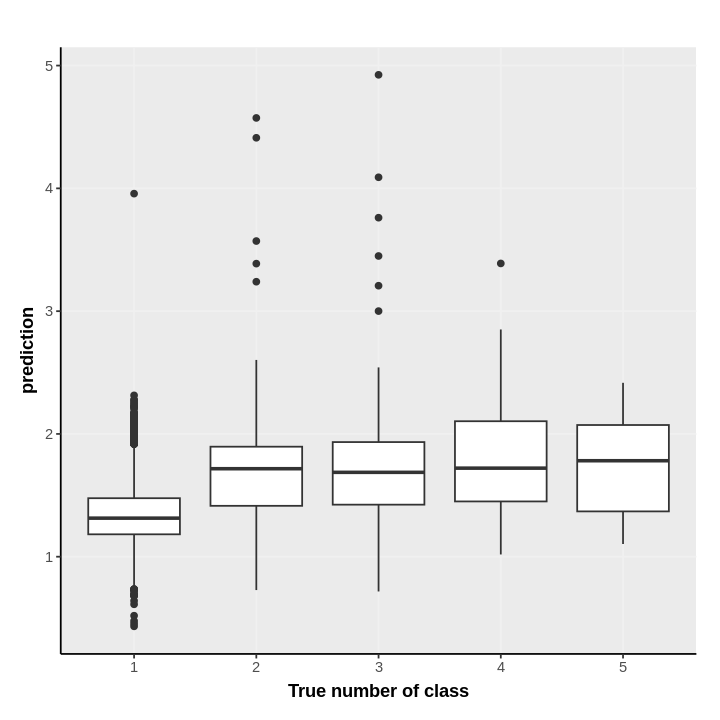

In [60]:

options(repr.plot.width = 6, repr.plot.height = 6)
data %>% ggplot(aes(x = as.factor(Num_class_on_mixture), y = prediction)) + 
    geom_boxplot() + theme_Publication() +
    labs(x = "True number of class")

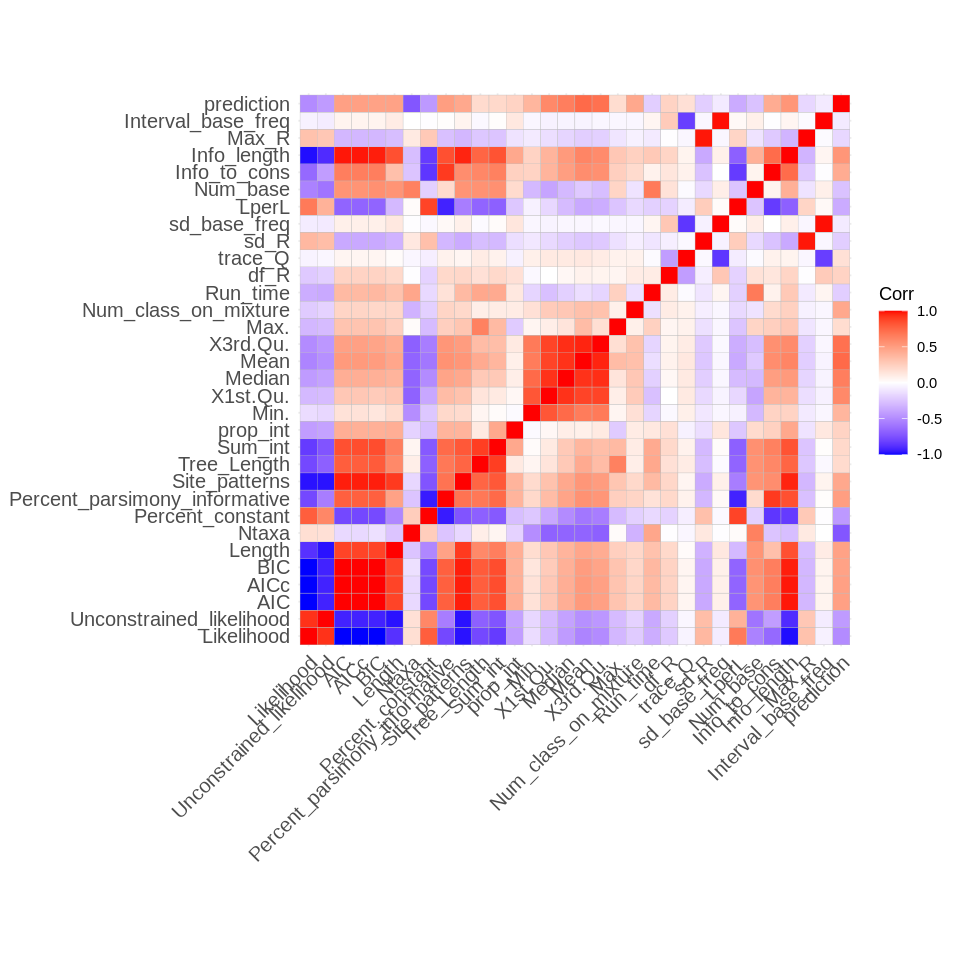

In [54]:
library(ggcorrplot)
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(data %>% select(which(sapply(data, is.numeric)))))


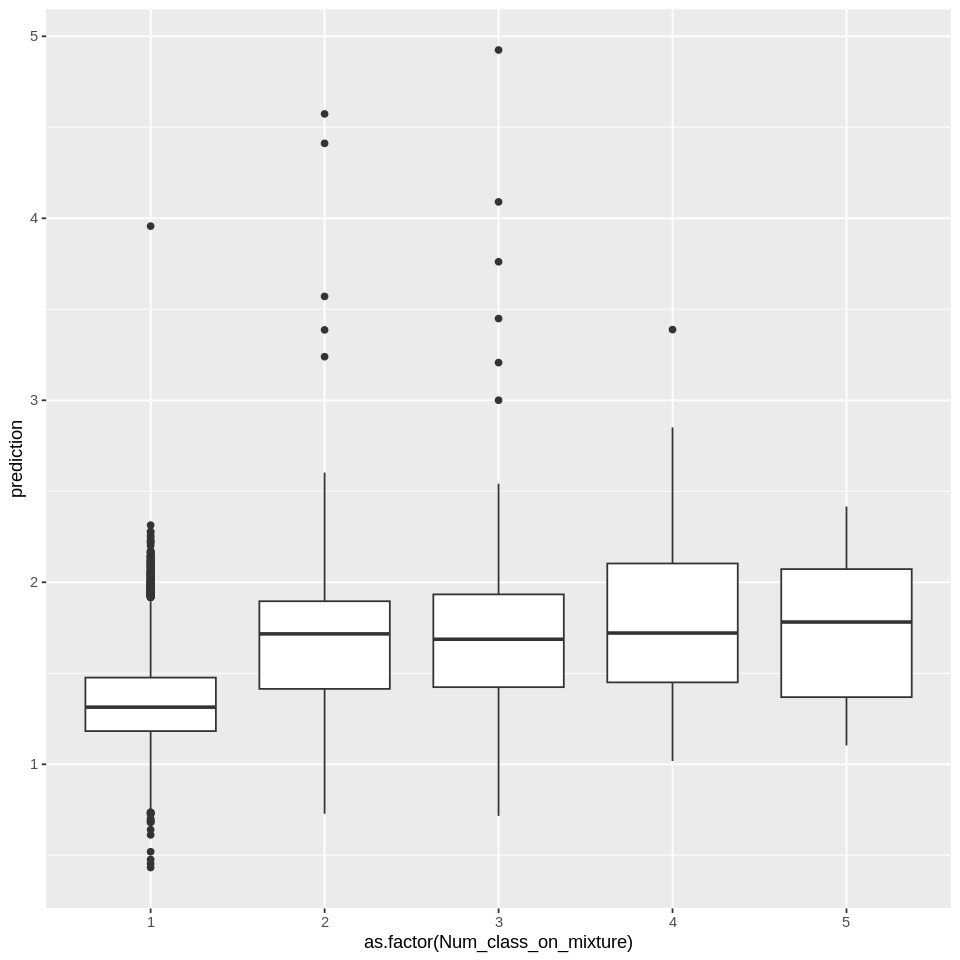

In [55]:

ggplot(data, aes(x = as.factor(Num_class_on_mixture), y = prediction)) + 
geom_boxplot()